In [146]:
# Read techno-economic assumptions and transport distances for transport cost calculation
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

# Production inputs

In [147]:
lcoh_green = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='LCOH_RES', decimal=',', index_col=0)
lcoh_green

,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
ID,,,,,,,,,,,,,,,,,,,,,
United_Arab_Emirates_Onshore_3_low_temp_baseline,7.083424,6.891298,6.715543,6.552560,6.399783,6.255316,6.117722,5.985886,5.858925,5.736129,...,4.691380,4.628208,4.566471,4.512363,4.403312,4.338001,4.274817,4.213586,4.154154,4.096389
United_Arab_Emirates_Offshore_1_low_temp_baseline,11.470109,11.104346,10.787404,10.505314,10.249265,10.013359,9.793456,9.586545,9.390367,9.203187,...,7.248224,7.116204,6.992261,6.880684,6.719989,6.607285,6.500267,6.398248,6.300666,6.207051
United_Arab_Emirates_Offshore_2_low_temp_baseline,15.518520,15.026419,14.603391,14.229709,13.892937,13.584745,13.299293,13.032333,12.780680,12.541890,...,9.892514,9.713566,9.545998,9.395894,9.176013,9.024151,8.880277,8.743419,8.612779,8.487690
United_Arab_Emirates_PV_2_low_temp_baseline,3.990183,3.815470,3.659375,3.516671,3.384029,3.259207,3.140629,3.027147,2.917901,2.812232,...,2.123259,2.077646,2.033698,1.995168,1.933859,1.891448,1.850562,1.811050,1.772783,1.735653
United_Arab_Emirates_PV_3_low_temp_baseline,4.167158,3.984340,3.821167,3.672128,3.533712,3.403554,3.279992,3.161815,3.048116,2.938202,...,2.218239,2.170581,2.124678,2.084494,2.020231,1.975935,1.933247,1.892006,1.852079,1.813348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South_Africa_PV_4_low_temp_optimistic,4.776238,4.522432,4.311259,4.130247,3.971568,3.830018,3.701980,3.584849,3.476693,3.376044,...,2.316135,2.243911,2.174816,2.115768,2.014671,1.948563,1.885225,1.824345,1.765661,1.708951
South_Africa_Onshore_3_high_temp_optimistic,6.957099,6.651531,6.361605,6.082880,5.812121,5.546874,5.285203,5.025533,4.766533,4.507054,...,3.527896,3.479815,3.432700,3.392380,3.300107,3.248513,3.198556,3.150082,3.102956,3.057060
South_Africa_Offshore_1_high_temp_optimistic,6.420926,6.101068,5.807786,5.532832,5.271000,5.018783,4.773702,4.533933,4.298081,4.065056,...,3.044944,2.985666,2.930034,2.880146,2.806048,2.755060,2.706577,2.660273,2.615880,2.573177


In [148]:
lowest_green = ((lcoh_green.loc['Norway_Onshore_2_low_temp_optimistic', 2025:2050]).mul(0.89))

In [149]:
lowest_green = pd.DataFrame(lowest_green)
lowest_green.index.name = 'Years'
lowest_green

,Norway_Onshore_2_low_temp_optimistic
Years,
2025,2.491992
2026,2.440769
2027,2.392928
2028,2.347980
2029,2.305535
2030,2.265274
2031,2.205328
2032,2.157935
2033,2.112188


In [150]:
lcoh_blue = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LCOH_NGR.csv", delimiter=';',
                       decimal=',', index_col=0)
lcoh_blue

,LCOH_BLUE
Years,
2025,2.204814438351501
2026,2.208151952102627
2027,2.2108765857524055
2028,2.2129121152654556
2029,2.2141767946557533
2030,2.214583014360132
2031,2.225073466704197
2032,2.2345900333926125
2033,2.2430213481715944


# Minimal productions costs

In [291]:
def choose_minimal_production_costs():
    result = min(LCOH_green, LCOH_blue)

    return result

In [294]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_production_costs'])
result.index.name = 'Years'

for year in years:
    # get all costs

    LCOH_green = float(lowest_green.loc[year]['Norway_Onshore_2_low_temp_optimistic'])
    LCOH_blue = float(lcoh_blue.loc[year]['LCOH_BLUE'])

    # calculate costs of specific year
    result.Minimal_production_costs.loc[year] = choose_minimal_production_costs()

result

,Minimal_production_costs
Years,
2025,2.204814
2026,2.208152
2027,2.210877
2028,2.212912
2029,2.214177
2030,2.214583
2031,2.205328
2032,2.157935
2033,2.112188


In [153]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Minimal_production_costs.csv')
result.to_csv(output_file, sep=';')

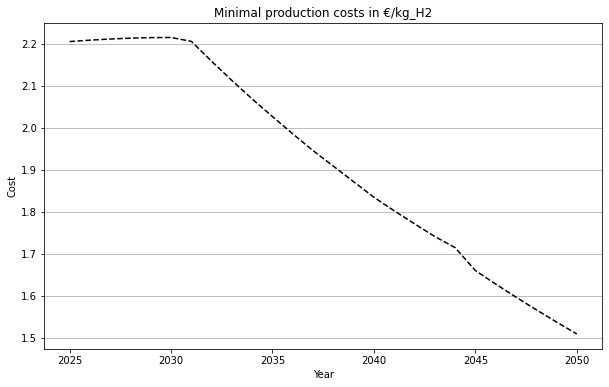

In [154]:
# Plot cost curve for production costst
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='black', linestyle='dashed')
plt.title('Minimal production costs in €/kg_H2')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

# Transport inputs

In [224]:
availabilities = pd.read_excel("/Users/jakob/PycharmProjects/H2_pathways_repo/data/raw/20220921_Data_Assumptions.xlsx", sheet_name='General Assumptions', decimal=',', index_col=0)
availabilities

,Value,Ref,Comment
Parameter,,,
WACC [%],0.08,NaN,NaN
NaN,NaN,NaN,NaN
Average exchange rate 2022 [€/$],0.9462,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate 2021 [€/$],0.8458,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate 2020 [€/$],0.877,NaN,NaN
Average exchange rate 2019 [€/$],0.8931,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate 2018 [€/$],0.8475,https://www.exchangerates.org.uk/USD-EUR-spot-...,NaN
Average exchange rate in 2018 [GBP/EUR],1.1301,https://www.exchangerates.org.uk/GBP-EUR-spot-...,NaN
NaN,NaN,NaN,NaN


In [225]:
this_year = int(availabilities.loc['Technology availability']['Value'])
this_year

2022

In [229]:
AV_pipe_new = int(availabilities.loc['New H2 pipeline - time from FID to commissioning [years]']['Value'])
AV_pipe_new

7

In [226]:
AV_pipe_retro = int(availabilities.loc['Retrofit H2 pipeline - availability from now [years]']['Value'])
AV_pipe_retro

13

In [227]:
AV_pipe_co2 = int(availabilities.loc['New CO2 pipeline - time from FID to commissioning [years]']['Value'])
AV_pipe_co2

7

In [221]:
AV_LH2 = int(availabilities.loc['LH2 shipping - availability']['Value'])
AV_LH2

3

In [222]:
AV_NH3 = int(availabilities.loc['Ammonia shipping - availability']['Value'])
AV_NH3

3

In [155]:
pipe_retro_off = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Retrofit_pipeline_costs_off.csv", delimiter=';', decimal=',', index_col= 0)
pipe_retro_off

,Retrofit_pipeline_costs_off
Years,
2025,0.10409905462513873
2026,0.10394264637182589
2027,0.10385643511928945
2028,0.10374656702981994
2029,0.10364868151571788
2030,0.10357168520416601
2031,0.10358691603904033
2032,0.10367326276261263
2033,0.10385732676865936


In [156]:
pipe_new_off = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/New_pipeline_costs_off.csv", delimiter=';',
    decimal=',', index_col=0)
pipe_new_off

,New_Pipeline_costs_off
Years,
2025,0.368797335237229
2026,0.36864092698391615
2027,0.3685547157313797
2028,0.3684448476419102
2029,0.36834696212780815
2030,0.3682699658162563
2031,0.36828519665113063
2032,0.36837154337470285
2033,0.3685556073807496


In [157]:
LH2 = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Lh2_transport_costs.csv", delimiter=';',
    decimal=',', index_col=0)
LH2

,LH2_transport_costs
Years,
2025,2.042047430133719
2026,1.978136150110184
2027,1.9167569086350145
2028,1.854633800099906
2029,1.7929940186678437
2030,1.7321209358239507
2031,1.6703058295908821
2032,1.6107949900343326
2033,1.5543663757565838


In [158]:
NH3 = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/LNH3_transport_costs.csv", delimiter=';',
    decimal=',', index_col=0)
NH3

,LNH3_transport_costs
Years,
2025,1.214362614284557
2026,1.1816132508958264
2027,1.1533525596630063
2028,1.1239515031470775
2029,1.0954954177033267
2030,1.0684316959183549
2031,1.0427629401967926
2032,1.0207601035926364
2033,1.003442329604268


# Minimal transport costs

In [325]:
def choose_minimal_transport_costs():

    if year < this_year + AV_pipe_new:
        result = min(TC_LH2, TC_NH3)
    elif year < this_year + AV_pipe_retro:
        result = min(TC_pipe_new, TC_LH2, TC_NH3)
    else:
        result = min(TC_pipe_new, TC_pipe_retro, TC_LH2, TC_NH3)


    return result

In [326]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Minimal_offshore_transport_costs'])
result.index.name = 'Years'

for year in years:

    # get all costs
    TC_pipe_new = float(pipe_new_off.loc[year]['New_Pipeline_costs_off'])

    TC_pipe_retro = float(pipe_retro_off.loc[year]['Retrofit_pipeline_costs_off'])

    TC_LH2 = float(LH2.loc[year]['LH2_transport_costs'])

    TC_NH3 = float(NH3.loc[year]['LNH3_transport_costs'])

    result.Minimal_offshore_transport_costs.loc[year] = choose_minimal_transport_costs()

result

,Minimal_offshore_transport_costs
Years,
2025,1.214363
2026,1.181613
2027,1.153353
2028,1.123952
2029,0.368347
2030,0.36827
2031,0.368285
2032,0.368372
2033,0.368556


In [313]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Minimal_offshore_transport_costs.csv')
result.to_csv(output_file, sep=';')

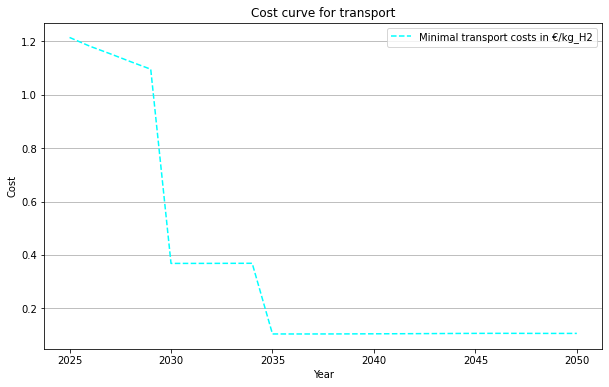

In [314]:
# Plot cost curve for seaborne transport
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Cost curve for transport')
plt.legend(['Minimal transport costs in €/kg_H2'])
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()

# Minimal supply costs


In [317]:
mpc = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Minimal_production_costs.csv", delimiter=';',
    decimal=',', index_col=0)
mpc

,Minimal_production_costs
Years,
2025,2.204814438351501
2026,2.208151952102627
2027,2.2108765857524055
2028,2.2129121152654556
2029,2.2141767946557533
2030,2.214583014360132
2031,2.2053277029068017
2032,2.1579351114294556
2033,2.1121879103013153


In [318]:
mtc = pd.read_csv("/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed/Minimal_offshore_transport_costs.csv", delimiter=';',
    decimal=',', index_col=0)
mtc

,Minimal_offshore_transport_costs
Years,
2025,1.214362614284557
2026,1.1816132508958264
2027,1.1533525596630063
2028,1.1239515031470775
2029,1.0954954177033267
2030,0.3682699658162563
2031,0.36828519665113063
2032,0.36837154337470285
2033,0.3685556073807496


In [319]:
def calculate_total_supply_costs():
    result = PC + TC

    return result

In [320]:
years = np.arange(2025, 2051)
result = pd.DataFrame(index=years, columns=['Total_supply_costs'])
result.index.name = 'Years'

for year in years:
    # get all costs

    PC = float(mpc.loc[year]['Minimal_production_costs'])
    TC = float(mtc.loc[year]['Minimal_offshore_transport_costs'])


    # calculate costs of specific year
    result.Total_supply_costs.loc[year] = calculate_total_supply_costs()

result

,Total_supply_costs
Years,
2025,3.419177
2026,3.389765
2027,3.364229
2028,3.336864
2029,3.309672
2030,2.582853
2031,2.573613
2032,2.526307
2033,2.480744


In [322]:
# Create csv file from results dataframe
path = r'/Users/jakob/PycharmProjects/H2_pathways_repo/data/processed'
output_file = os.path.join(path, 'Minimal_supply_costs.csv')
result.to_csv(output_file, sep=';')


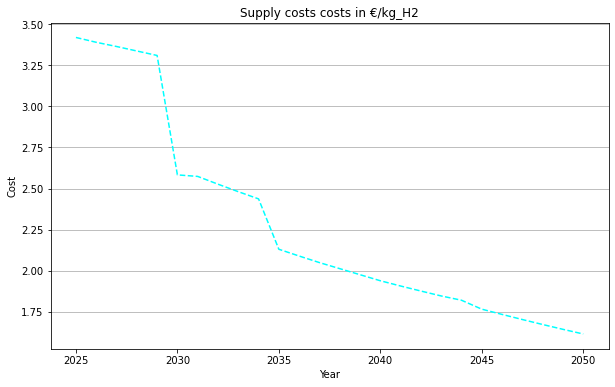

In [323]:
# Plot cost curve for total supply costs
fig, ax = plt.subplots(figsize=(10, 6))
plt.grid(True, axis='y')
ax.set_axisbelow(True)
plt.plot(result, color='cyan', linestyle='dashed')
plt.title('Supply costs costs in €/kg_H2')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.show()


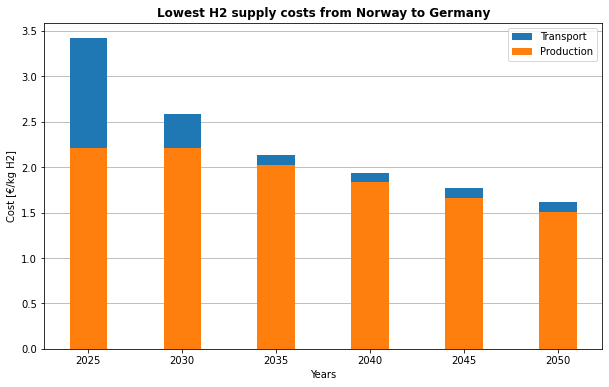

In [324]:
# Cost breakdown for H2 supply
fig, ax = plt.subplots(figsize=(10,6))
plt.grid(True, axis = 'y')
ax.set_axisbelow(True)
x = np.arange(2025, 2051, step=5)

PC = (mpc.loc[::5]['Minimal_production_costs']).apply(pd.to_numeric)
TC = mtc.loc[::5]['Minimal_offshore_transport_costs'].apply(pd.to_numeric)
width = 2       # the width of the bars: can also be len(x) sequence


TC_plt = plt.bar(x,TC, width, label='Transport', bottom= PC)
PC_plt = plt.bar(x,PC, width, label='Production')

plt.title('Lowest H2 supply costs from Norway to Germany', fontweight='bold')
plt.legend(loc='upper right')
plt.ylabel('Cost [€/kg H2]')
plt.xlabel('Years')
plt.show()
